In [1]:
from dabl import plot
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

In [2]:
data = pd.DataFrame(np.random.normal(scale=4, size=(1000, 2)), columns=["cont1", "cont2"])

In [3]:
data['cat1'] = 1 - 2 * np.random.randint(0, 2, size=1000)
data['cat2'] = 1 - 2 * np.random.randint(0, 2, size=1000)

In [4]:
data['y'] = data.cat1 * (data.cont1 + 2) ** 2 - 10 * data.cat1 + data.cont1 * 0.5  + data.cat2 * data.cont2 * 3

Target looks like regression


/home/amueller/public/dabl/dabl/plot/utils.py:668: UserWarning: Dropped 3 outliers in column y.
  warn("Dropped {} outliers in column {}.".format(
/home/amueller/public/dabl/dabl/plot/supervised.py:636: UserWarning: Discarding 3 outliers in target column.
  warn(f"Discarding {n_outliers} outliers in target column.",


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='y', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=5.66E-02'}, xlabel='cont1', ylabel='y'>,
         <AxesSubplot:title={'center':'F=-7.85E-03'}, xlabel='cont2'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=1.06E-01'}, xlabel='y', ylabel='cat1'>,
         <AxesSubplot:title={'center':'F=9.77E-03'}, xlabel='y', ylabel='cat2'>]],
       dtype=object)]

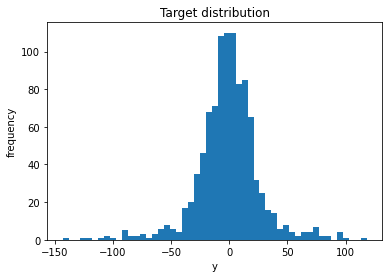

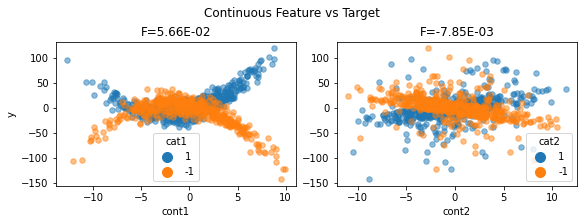

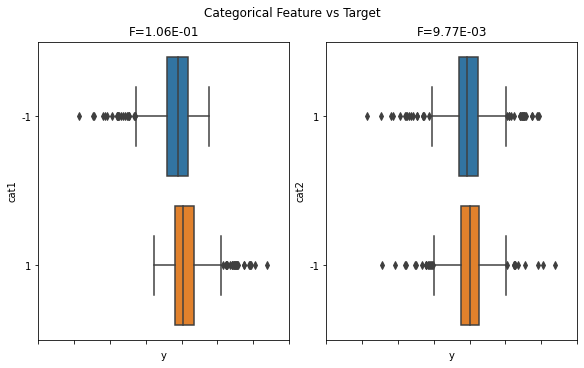

In [5]:
plot(data, target_col="y", find_scatter_categoricals=True)

/home/amueller/miniconda3/envs/dabl_dev/lib/python3.9/site-packages/sklearn/datasets/_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name visualizing_soil exist. Versions may be fundamentally different, returning version 1.
  warn(


(8641, 5)
Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='track', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=6.77E-01'}, xlabel='northing', ylabel='track'>,
         <AxesSubplot:title={'center':'F=1.13E-01'}, xlabel='easting'>,
         <AxesSubplot:title={'center':'F=-6.80E-02'}, xlabel='resistivity'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=3.18E-01'}, xlabel='track', ylabel='isns'>]],
       dtype=object)]

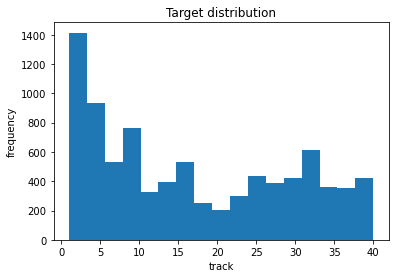

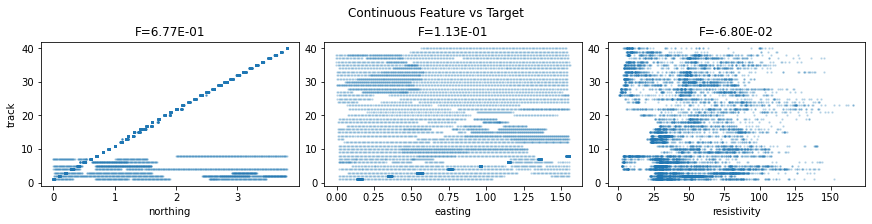

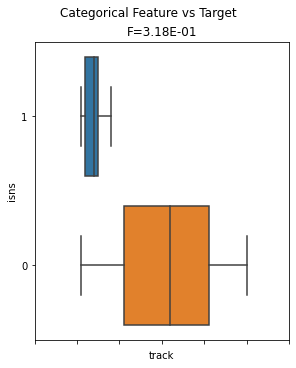

In [5]:
#data = fetch_openml('plasma_retinol', as_frame=True)
#data = fetch_openml('boston', as_frame=True)

#data = fetch_openml('lowbwt', as_frame=True)
# data = fetch_openml('cps_85_wages', as_frame=True)
# data = fetch_openml('visualizing_soil', as_frame=True) ###

# data = fetch_openml('diamonds', as_frame=True) ###

# data = fetch_openml('machine_cpu', as_frame=True)

# data = fetch_openml('bank32nh', as_frame=True)

# data = fetch_openml('autoPrice', as_frame=True)

#data = fetch_openml('rainfall_bangladesh', as_frame=True)

#data = fetch_openml('Housing-Prices-in-London', as_frame=True) ###

# data = fetch_openml('Brazilian_houses', as_frame=True) #######

# data = fetch_openml('house_sales', as_frame=True) #####

# data = fetch_openml('New-Delhi-Rental-Listings', as_frame=True) ##### <- this!!

# data = fetch_openml('1000-Cameras-Dataset', as_frame=True) #####

# data = fetch_openml('Used-Cars-Dataset', as_frame=True) ### BIG LOL

## data = fetch_openml('Brilliant-Diamonds', as_frame=True)

# data = fetch_openml('2018-Airplane-Flights', as_frame=True)
# 
# 
# 
# Bike-Sharing-Washington-DC
# Worldwide-Meat-Consumption
# features-and-price-of-computer-components
# US-Real-Estate-Listings-by-Zip-Code
# Business-Courses---Udemy-(10k-courses)

print(data.frame.shape)
if data.target is not None:
    target_col = data.target.name
elif "Price" in data.frame.columns:
    target_col = "Price"
elif "price" in data.frame.columns:
    target_col = "price"

plot(data.frame, target_col=target_col, type_hints={target_col: 'continuous'}, prune_correlations_threshold=0.999)

In [ ]:
from dabl.datasets import load_ames
import matplotlib.pyplot as plt

# load the ames housing dataset
# returns a plain dataframe
data = load_ames()

plot(data, 'SalePrice')

(0.0, 10000.0)

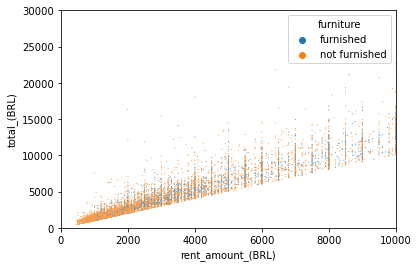

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=data.frame, x='rent_amount_(BRL)', y='total_(BRL)', hue='furniture', s=1)
plt.ylim(0, 30000)
plt.xlim(0, 10000)

<AxesSubplot:xlabel='x', ylabel='price'>

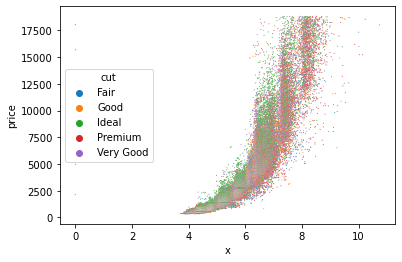

In [16]:
sns.scatterplot(data=data.frame, x='x', y='price', hue='cut', s=1)

<AxesSubplot:xlabel='x', ylabel='price'>

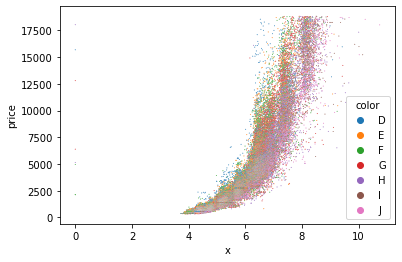

In [22]:
sns.scatterplot(data=data.frame, x='x', y='price', hue='color', s=1)

In [17]:
from dabl.plot.utils import _score_triple

In [20]:
_score_triple(data.frame, 'x', 'price', 'clarity', random_state=None)

0.18912009070727445

In [19]:
_score_triple(data.frame, 'x', 'price', 'cut', random_state=None)

0.24072779386782717

In [21]:
_score_triple(data.frame, 'x', 'price', 'color', random_state=None)

0.20197128048294252

<AxesSubplot:xlabel='x', ylabel='price'>

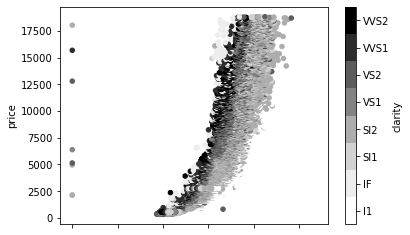

In [10]:
data.frame.plot.scatter('x', 'price', c='clarity')

In [8]:
from dabl import detect_types

In [14]:
from warnings import warn

X = data.frame
target_col = "price"
types = detect_types(X)
features = X.loc[:, types.continuous]

if target_col in features.columns:
    features = features.drop(target_col, axis=1)

show_top = 6  # _get_n_top(features, "continuous")

target = X[target_col]
correlation="spearman"
prune_correlations_threshold = 0.95

correlations = features.corrwith(target, method=correlation)
corrs = correlations.abs().sort_values().dropna().index[::-1]
if prune_correlations_threshold > 0:
    top_k = []
    for col in corrs:
        corr = features[top_k].corrwith(features[col], method="spearman")
        corr = corr.abs()
        if not len(top_k) or corr.max() < prune_correlations_threshold:
            top_k.append(col)
        else:
            warn(f"Not plotting highly correlated ({corr.max()})"
                 f" feature {col}")
        if len(top_k) == show_top:
            break
else:
    top_k = corrs[:show_top]

/tmp/ipykernel_13787/395208859.py:27: UserWarning: Not plotting highly correlated (0.9961166041570525) feature carat
  warn(f"Not plotting highly correlated ({corr.max()})"
/tmp/ipykernel_13787/395208859.py:27: UserWarning: Not plotting highly correlated (0.9978949275849379) feature y
  warn(f"Not plotting highly correlated ({corr.max()})"
/tmp/ipykernel_13787/395208859.py:27: UserWarning: Not plotting highly correlated (0.9873553172140505) feature z
  warn(f"Not plotting highly correlated ({corr.max()})"


In [16]:
top_k

['x', 'table', 'depth']

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def _score_triple(X, cont1, cont2, cat, random_state):
    # score how well you can predict a category from two continuous features
    # assume this tree is simple enough so not be able to overfit in 2d
    # so we don't bother with train/test split
    # limit to 2000 training points for speed?
    this_X = X.loc[:, [cont1, cont2]]
    target = X.loc[:, cat]
    train_size = min(2000, int(.9 * this_X.shape[0]))
    cv = StratifiedShuffleSplit(n_splits=3, train_size=train_size,
                                random_state=random_state)
    tree = DecisionTreeClassifier(max_leaf_nodes=8)
    return np.mean(cross_val_score(
        tree, this_X, target, cv=cv, scoring='recall_macro'))

In [34]:
import itertools
import pandas as pd

top_cont = top_k
random_state = None
categorical_features = X.columns[types.categorical]
scores = [(cont, cat, _score_triple(
            X, target_col, cont, cat, random_state=random_state))
          for cont, cat in itertools.product(
            top_cont, categorical_features)]
scores = pd.DataFrame(scores, columns=['cont', 'cat', 'score'])
best_categorical = scores.groupby('cont').max('score')


In [39]:
best_categorical

,score
cont,
depth,0.533081
table,0.404722
x,0.244724


In [41]:
asdf = scores.groupby('cont')

In [42]:
asdf.score.idxmax()

cont
depth    6
table    3
x        0
Name: score, dtype: int64

In [49]:
asdf = scores.pivot(index='cat', columns='cont', values='score').idxmax()

In [50]:
asdf

cont
depth    cut
table    cut
x        cut
dtype: object

In [48]:
asdf.idxmax()

cont
depth    cut
table    cut
x        cut
dtype: object